<a href="https://colab.research.google.com/github/rdambrosioz/aa_2021/blob/main/aa_tarea1_costanzo_dambrosio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE 1
Efectúe un profundo análisis exploratorio del dataset, incluyendo un estudio de 
correlación entre las variables del mismo. Explique detalladamente los métodos 
utilizados. Para obtener una representación gráfica de la correlación entre variables, se 
recomienda utilizar el método heatmap del paquete Seaborn [3]. Discuta 
detalladamente los resultados obtenidos.


In [ ]:
# Importamos paquetes necesarios
import sklearn as s
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# wine_df = pd.read_csv('winequality-red.csv')
wine_df = pd.read_csv('https://raw.githubusercontent.com/rdambrosioz/aa_2021/main/winequality-red.csv')

In [ ]:
features = wine_df.columns[0:-1]
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


(fixed acidity           float64
 volatile acidity        float64
 citric acid             float64
 residual sugar          float64
 chlorides               float64
 free sulfur dioxide     float64
 total sulfur dioxide    float64
 density                 float64
 pH                      float64
 sulphates               float64
 alcohol                 float64
 quality                   int64
 dtype: object, count    1599.000000
 mean        5.636023
 std         0.807569
 min         3.000000
 25%         5.000000
 50%         6.000000
 75%         6.000000
 max         8.000000
 Name: quality, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x7efcddbe1210>, Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol'],
       dtype='object'))

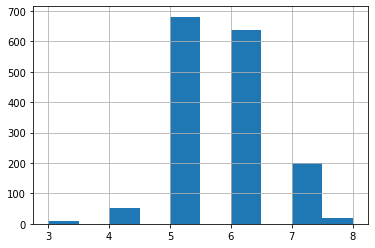

In [ ]:
wine_df.dtypes, wine_df['quality'].describe(),  wine_df['quality'].hist(), features

Se estudia la distribución de la variable 'quality'. Podemos ver que es discreta, en paricular ordinal.  




### Estudio de los features y la correlación de las variables

<Figure size 1440x1440 with 0 Axes>

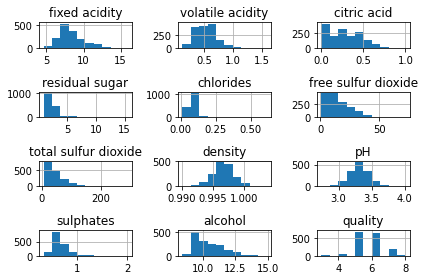

In [ ]:
plt.figure(figsize=(20,20))
wine_df.hist()
plt.tight_layout()
plt.show()

La idea es ver las distintas distribuciones de los features. En particular, la mayoría de ellos pareciera tener distribución normal. No obstante, 'free sulfure dioxide', 'total sulfure dioxide', 'residual sugar', 'alcohol' y 'citric acid' parecieran tener distribuciones exponenciales.

In [ ]:
correlations = wine_df.corr(method='pearson')
correlations
# ('alcohol', 0.47616632400114156),  --> density
# ('volatile acidity', -0.3905577802640094),  --> citric acid
# ('sulphates', 0.25139707906926206),
# ('citric acid', 0.2263725143180432),
# ('total sulfur dioxide', -0.18510028892653843),
# ('density', -0.1749192277833492),
# Mucha correlacion > 0.5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Aqui se presenta la matriz de correlaciones de los distintos features. Luego se utilizaran los 6 más correlacionados con la variable 'quality' para realizar un modelo de regresión lineal. Sin embargo, resulta interesante notar que hay dos de ellos (alcohol y volatile acidity) que pueden generar problemas por estar bastante correlacionados (correlacion > 0.5) con otros dos features (density y citric acid respectivamente)

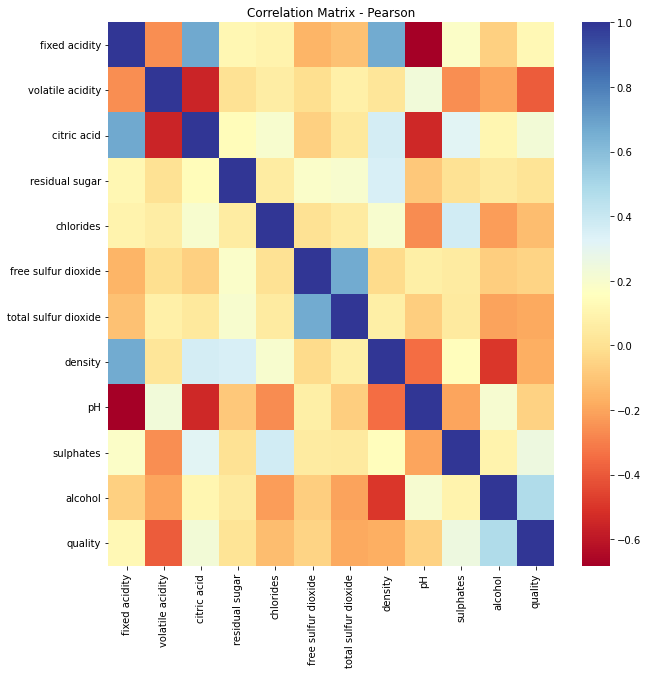

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlations, cbar=True, cmap='RdYlBu')
plt.title('Correlation Matrix - Pearson')
plt.show()

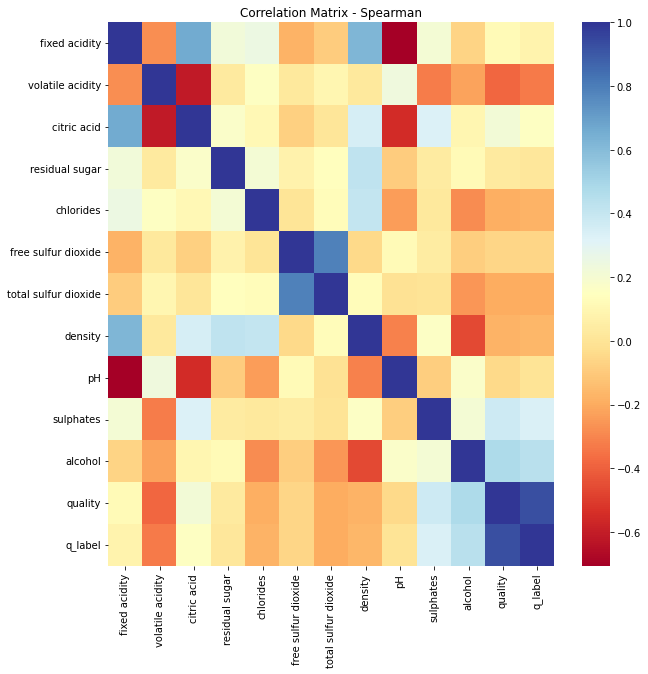

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_df.corr(method='spearman'), cbar=True, cmap='RdYlBu')
plt.title('Correlation Matrix - Spearman')
plt.show()


Aqui se presentan graficamente las matrices de correlacion de los feature. En particular se utilizan dos metricas de correlación distintas (Pearson y Spearmann)

### Heterocerasticidad

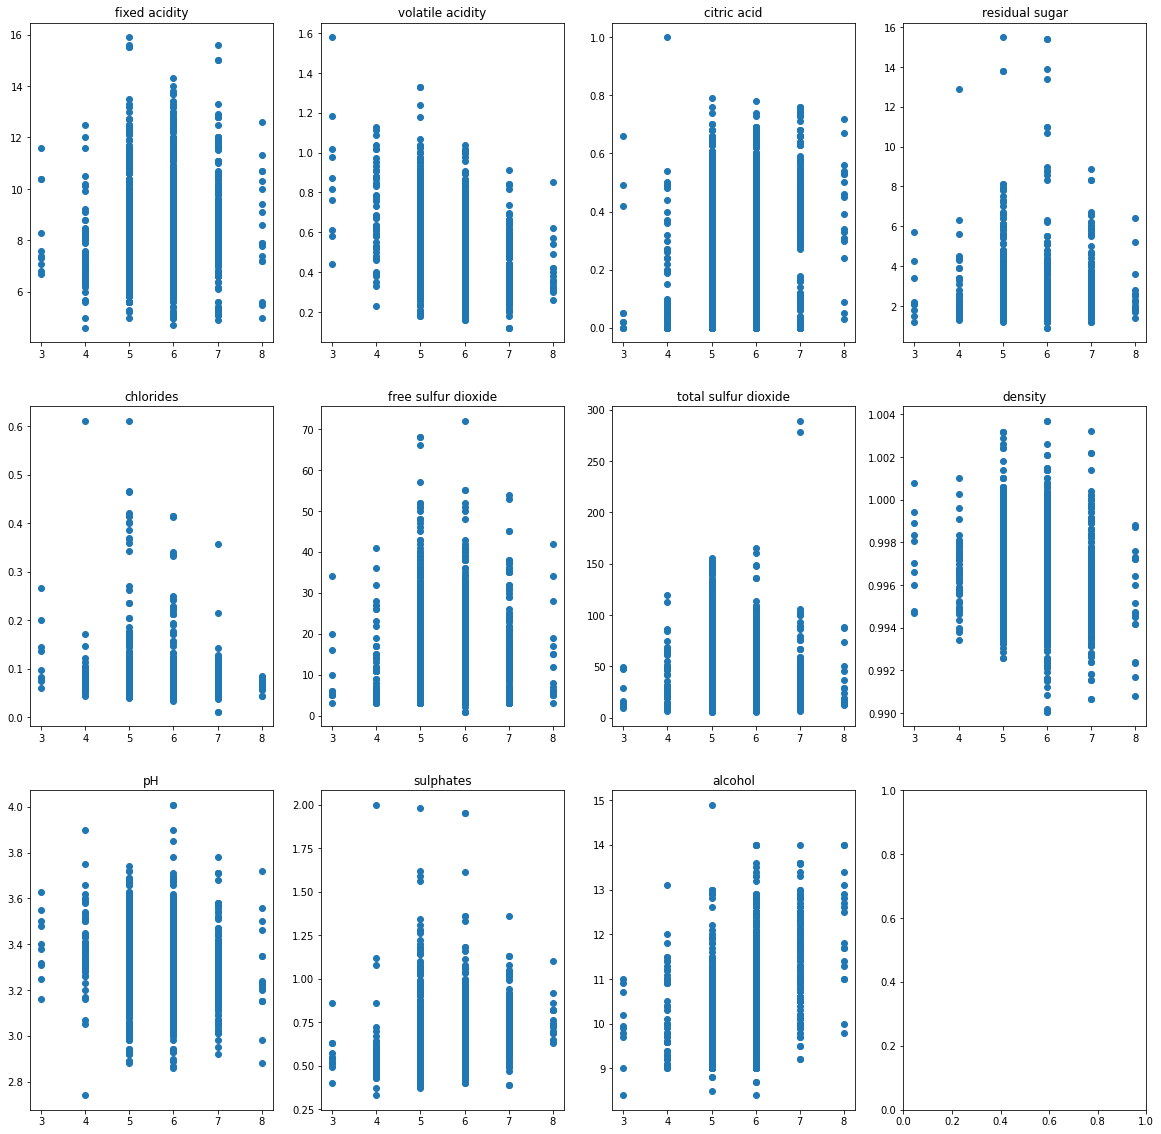

In [ ]:
features = wine_df.columns[0:-1]
label = wine_df['quality']
f, ax = plt.subplots(3,4, figsize=(20,20))
i = 0
for j in range(3):
  for a in ax[j]:
    if i < 11:
      a.scatter(label, wine_df[features[i]])
      a.set_title(features[i])
      i += 1

Aqui se grafican las distintas features en función del label 'quality'. Esto puede ayudar a ver la correlación entre cada una de las variables y la clase a predecir, asi como también entender la disperción de los valores de cada feature según el valor de la clase.

Ademas, a simple vista, pareciera que los distintos features no presentan grandes problemas de heterocerasticidad.

In [ ]:
corr_ord = sorted([(i,coef) for i, coef in zip(correlations.index, correlations['quality'])], key= lambda x : abs(x[1]), reverse=True)
corr_ord

[('quality', 1.0),
 ('alcohol', 0.47616632400114156),
 ('volatile acidity', -0.3905577802640094),
 ('sulphates', 0.25139707906926206),
 ('citric acid', 0.2263725143180432),
 ('total sulfur dioxide', -0.18510028892653843),
 ('density', -0.1749192277833492),
 ('chlorides', -0.12890655993005315),
 ('fixed acidity', 0.1240516491132247),
 ('pH', -0.0577313912053823),
 ('free sulfur dioxide', -0.05065605724427643),
 ('residual sugar', 0.013731637340066346)]

Finalmente, se ordenan los features en orden de correlación con la clase 'quality'. De esta forma, se puede luego elegir las k features mas correlacionadas con la clase a predecir para crear los modelos de regresión lineal.

# PARTE 2
Partiendo de los atributos de características del vino utilice el método de regresión 
lineal para predecir la calidad del mismo. Analice los resultados obtenidos. Revise y 
discuta si existen mecanismos para mejorar las métricas que arroja este modelo.

Para una regresión lineal se podrían utilizar todos los features. Sin embargo,esto no solo genera un retrabajo innecesario (ya que puede que ciertas variables no aporten a la predicción), sino que ademas podrían generar peores modelos.

Para la seleccion de las variables tomamos dos caminos distintos. En primer luga, y como adelantamos antes, elegimos las k variables mas correlacionadas con la clase. En segundo lugar, utilizamos el metod SlectKBest de sklearn, que elige las k variables que generan mejores resultados.

Esta función evalua los distintos features y selecciona los K mejores, en base a una funcion que devuelve un score y su pvalor para cada uno de ellos. En particular, para esa función de score utilizamos chi2 de sklearn. Este computa el estadístico de Chi^2 para los distintos features.

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

sample = 0.8
n_features = 5

def get_X_Y(sample, n_features, df, corr_ord):
  df_train, df_test = train_test_split(df, test_size=1-sample)

  X_train = df_train[[i[0] for i in corr_ord[1:n_features]]]
  X_test = df_test[[i[0] for i in corr_ord[1:n_features]]]
  Y_train = df_train['quality']
  Y_test = df_test['quality']

  return X_train, X_test, Y_train, Y_test


Esta funcion devuelve los vectoers X e Y dado un coeficiente de sample y un número de features a utilizar. En particular se elegien las n_features mas correlacionadas

In [ ]:
def my_linear_model(X_train, X_test, Y_train, Y_test):
  regr = linear_model.LinearRegression()

  regr.fit(X_train, Y_train)

  Y_pred = regr.predict(X_test)

  mse = mean_squared_error(Y_test, Y_pred)
  r2 = r2_score(Y_test, Y_pred)
  mae =  mean_absolute_error(Y_test, Y_pred)

  # print('MSE: %.2f' % mse)
  # print('R2: %.2f' % r2)
  # print('MAE: %.2f' % mae)
  
  return Y_pred, mse, r2, mae

Aqui se ejecuta el modelo lieneal a partir de los vectores X e Y de entrenamiento y validación. Se devuelven las métricas del modelo.

In [ ]:
all_linear_models = []
sample = 0.8
for i in range(2,len(corr_ord)):
  X_train, X_test, Y_train, Y_test = get_X_Y(sample, i, wine_df, corr_ord)
  Y_pred, mse, r2, mae = my_linear_model(X_train, X_test, Y_train, Y_test)
  all_linear_models += [(i,mse,r2,mae)]

pd.DataFrame(all_linear_models, columns=['n_feature_', 'mse', 'r2', 'mae'])

,n_feature_,mse,r2,mae
0,2,0.498737,0.224215,0.559429
1,3,0.432374,0.364511,0.519460
2,4,0.405573,0.309479,0.512520
3,5,0.504552,0.203064,0.546863
4,6,0.432038,0.295250,0.512341
5,7,0.447794,0.259415,0.520277
6,8,0.398959,0.267006,0.494902
7,9,0.394767,0.331955,0.488881
8,10,0.392338,0.387233,0.497644
9,11,0.400539,0.380051,0.479175


Este es el primer approach. Se prueba iterativamente la cantidad de variables a utilizar. En función de las métricas, definimos que b_feature = 6 es una cantidad de variables optima.

### Mejor modelo lineal en base a la correlación de los features

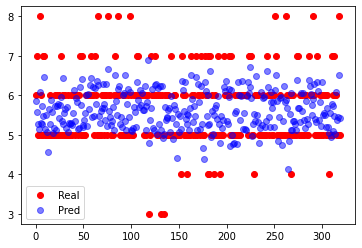

In [ ]:
X_train, X_test, Y_train, Y_test = get_X_Y(sample, 6, wine_df, corr_ord)
Y_pred, mse, r2, mae = my_linear_model(X_train, X_test, Y_train, Y_test)
real = plt.scatter([i for i in range(len(Y_test))], Y_test,c='r')
pred = plt.scatter([i for i in range(len(Y_test))], Y_pred,c='b', alpha=0.5)
plt.legend([real, pred], ['Real','Pred'])

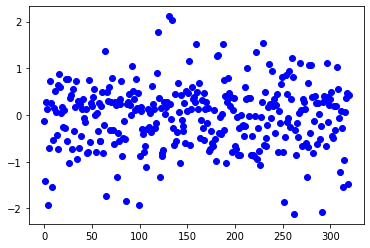

In [ ]:
plt.scatter([i for i in range(len(Y_test))], [i1-i2 for i1,i2 in zip(Y_pred, Y_test)] ,c='b')

(array([  7.,   7.,  18.,  57.,  59., 102.,  45.,  16.,   6.,   3.]),
 array([-2.11682914, -1.69389779, -1.27096644, -0.84803508, -0.42510373,
        -0.00217238,  0.42075897,  0.84369032,  1.26662167,  1.68955303,
         2.11248438]),
 <a list of 10 Patch objects>)

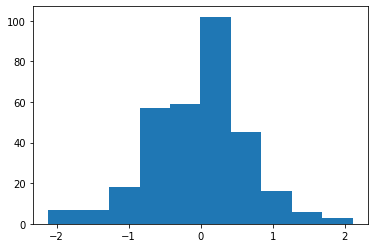

In [ ]:
plt.hist([i1-i2 for i1,i2 in zip(Y_pred, Y_test)])

Arriba se presenta el mejor modelo hallado. Ademas, se estudia la distribución de los residuos para poder estar seguros que estramos bajo los supuestos para que la regresión lineal sea valida.

Ademas de obtener las métricas para el modelo, resulta interesante plotear las predicciones y los valores reales para cada instancia. 
Aqui podemos observar que las predicciones no son necesariamente un valor discreto, dado que estamos realizando una regresión lineal.

MSE: 0.55
R2: 0.25
MAE: 0.46


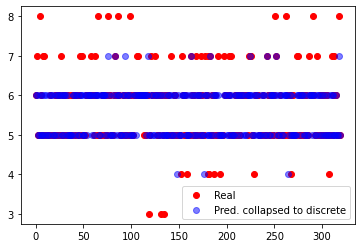

In [ ]:
import math
Y_pred_adapted = [math.floor(i) if abs(math.floor(i)-i) <= 0.5 else math.ceil(i) for i in Y_pred]
print('MSE: %.2f' % mean_squared_error(Y_test, Y_pred_adapted))
print('R2: %.2f' % r2_score(Y_test, Y_pred_adapted))
print('MAE: %.2f' % mean_absolute_error(Y_test, Y_pred_adapted))

real =  plt.scatter([i for i in range(len(Y_test))], Y_test,c='r')
pred = plt.scatter([i for i in range(len(Y_test))], Y_pred_adapted,c='b', alpha=0.5)
plt.legend([real, pred], ['Real','Pred. collapsed to discrete'])

Visto lo anterior, resulta interesante obtener las métricas del modelo luego de colapsar las predicciones continuas a los posibles valores discretos de la variable 'quality'. Vemos que en este caso las métricas empeoran

### Mejor modelo lineal con SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline

X_train, X_test, Y_train, Y_test = get_X_Y(sample, len(corr_ord), wine_df, corr_ord)

pipe = Pipeline([('fselector', SelectKBest(chi2, k=6)), ('l_reg', linear_model.LinearRegression())])
pipe.fit(X_train, Y_train)
Y_pred = pipe.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae =  mean_absolute_error(Y_test, Y_pred)

print('MSE: %.2f' % mse)
print('R2: %.2f' % r2)
print('MAE: %.2f' % mae)


MSE: 0.39
R2: 0.35
MAE: 0.50


En el caso del ChiSelector, utilizamos tambien las mejores 6 features (para ser justos con el modelo de features elegidos segun su correlacion).

Podemos ver como logramos un modelo similar, con métricas un poco por debajo

# PARTE 3
Utilizando los métodos de clasificación vistos en el curso, se pretende encontrar el mejor modelo que permita predecir, a partir de las características disponibles en el dataset [1], la calidad del vino. La variable de calidad debe de convertirse a una clase de 2 valores: bueno y malo,. Será parte del problema definir el umbral de corte para determinar esta clase, partiendo de las categorías definidas en [1].
Utilizando los métodos y métricas vistas en el curso, compare los resultados obtenidos. Para todos los métodos utilizados, estudie la relevancia de cada uno de los atributos o features.
Para cada uno de los modelos utilizados, detalle los hiperparámetros aplicados.



Algo importante de aclarar de aqui en mas, es que al no haber mayor información acerca de la finalidad del modelo, no podemos saber si es mas importante tener un buen recall o una mejor precision. Por ende, tomamos como metrica comparativa para los distintos modelos el score de accuracy.

(count    1599.000000
 mean        5.636023
 std         0.807569
 min         3.000000
 25%         5.000000
 50%         6.000000
 75%         6.000000
 max         8.000000
 Name: quality, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efccb278350>)

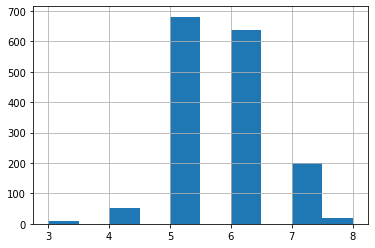

In [ ]:
wine_df['quality'].describe(),  wine_df['quality'].hist()

In [ ]:
def set_label(df, umbral, label_name, rank_name):

  df[label_name] = [1 if q>=umbral else 0 for q in df[rank_name]]
  return df

Se mira la distribución de 'quality' para poder tomar una decisión certera al momento de parcicionar los valores discretos en una variable binaria.

### Categorización binaria de 'quality'

In [ ]:
wine_df = set_label(wine_df, 6, 'q_label', 'quality')
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,q_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


Se decide tomar un umbral de 6 por diferentes motivos: 

1. Primero, visualmente parece ser un punto de quiebre en la distribución de la variable 'quality'. 

2. En segundo lugar, particiona de forma balanceada el dataset. Esto no solo ayudara luego a los modelos, sino que también parece ciertamente logico que aquellos vinos que esten el el percentil 50 superior sean calificados como buenos y los del inferior como malos, cuando solo tenemos dos etiquetas posibles.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

def get_scores(Y_pred, probs, Y_test, plot=True):

  # Calcular TP, TN, FP, FN
  # Armar matriz de cofusion
  # Recall, Precision, Accuracy, F1
  # AUC
  # probas = model.predict_proba(X_test)
  fpr, tpr, thresholds = roc_curve(Y_test,probs[:,1])
  if plot:
    plt.plot([0,1],[0,1],'k--') #se grafica la linea diagonal
    plt.plot(fpr, tpr, label='NB') #se grafica la curva ROC
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show()
    print("AUC: {}" .format(auc(fpr, tpr)))

  accuracy = accuracy_score(Y_test, Y_pred)
    
  
  mat = confusion_matrix(Y_test, Y_pred)
  if plot:
    print (classification_report(Y_test,Y_pred))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Clase de test')
    plt.ylabel('Clase de la predicción');

  return accuracy

In [ ]:
sample = 0.8
df_train, df_test = train_test_split(wine_df, train_size=sample)

X_train = df_train[features]
X_test = df_test[features]
Y_train = df_train['q_label']
Y_test = df_test['q_label']

In [ ]:
from sklearn.naive_bayes import GaussianNB
all_gdb = []
for f in range(1,len(features)+1):
  model = GaussianNB()

  pipe = Pipeline([('fselector', SelectKBest(chi2, k=f)), ('gnb', model)])
  pipe.fit(X_train, Y_train)
  new_Y_pewd = pipe.predict_proba(X_test)

  # new_Y_pewd = model.predict_proba(X_test)
  umbral_prob = 0.5
  Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
  all_gdb += [(f,get_scores(Y_pred, new_Y_pewd, Y_test, plot=False))]

all_gdb = sorted(all_gdb, key = lambda x : x[1], reverse=True)
all_gdb = pd.DataFrame(all_gdb, columns=['n_feature', 'acc'])
all_gdb

,n_feature,acc
0,11,0.746875
1,9,0.731250
2,7,0.728125
3,10,0.728125
4,8,0.725000
5,6,0.721875
6,4,0.712500
7,5,0.706250
8,3,0.668750
9,1,0.581250


Se ejecuta el modelo iterativamente eligiendo las k variables mas trascendentes en cada iteración. Estas son seleccionadas con la función SelectKBest explicada anteriormente, con chi2 como función de score.

De esta forma, podemos ver cual es el valor de K que mejora el modelo. Con ese K entrenamos el modelo nuevamente y obtenemos todas sus métricas.

### Mejor modelo de Bayes

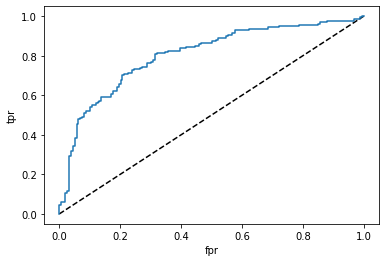

AUC: 0.8035860775811555
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       159
           1       0.72      0.81      0.76       161

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



0.746875

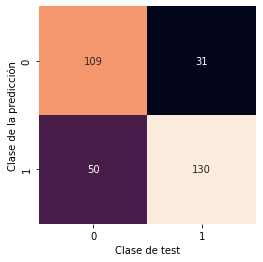

In [ ]:
model = GaussianNB()
# model.fit(X_train, Y_train);

pipe = Pipeline([('fselector', SelectKBest(chi2, k=all_gdb['n_feature'][0])), ('gnb', model)])
pipe.fit(X_train, Y_train)
new_Y_pewd = pipe.predict_proba(X_test)

# new_Y_pewd = model.predict_proba(X_test)
umbral_prob = 0.5
Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
get_scores(Y_pred, new_Y_pewd, Y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# model.fit(X_train, Y_train);

pipe = Pipeline([('fselector', SelectKBest(chi2, k=10)), ('lr', model)])
pipe.fit(X_train, Y_train)
new_Y_pewd = pipe.predict_proba(X_test)

# new_Y_pewd = model.predict_proba(X_test)
umbral_prob = 0.5
Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
'Accuracy', get_scores(Y_pred, new_Y_pewd, Y_test,False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


('Accuracy', 0.725)

En el caso de la regresión logística, se realiza un primer modelo sin tener en cuenta realmente los hiperparametros.

In [ ]:
all_lr = []
for f in range(1,len(features)+1):
  model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced')
  # model.fit(X_train, Y_train);

  pipe = Pipeline([('fselector', SelectKBest(chi2, k=f)), ('lr', model)])
  pipe.fit(X_train, Y_train)
  new_Y_pewd = pipe.predict_proba(X_test)

  # new_Y_pewd = model.predict_proba(X_test)
  umbral_prob = 0.5
  Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
  all_lr += [(f,get_scores(Y_pred, new_Y_pewd, Y_test, plot=False))]

all_lr = sorted(all_lr, key = lambda x : x[1], reverse=True)
all_lr = pd.DataFrame(all_lr, columns=['n_feature', 'acc'])
all_lr

,n_feature,acc
0,9,0.740625
1,10,0.740625
2,11,0.740625
3,4,0.737500
4,6,0.737500
5,7,0.737500
6,8,0.737500
7,5,0.734375
8,3,0.684375
9,2,0.628125


Luego, se realiza un estudio mas detallado de los hiperparametros. 

* Para elegir los features a utilizar en el modelo, se utiliza el mismo método que en GaussianNB y se realiza la misma iteración para encontrar K.

* Se selecciona el optimizador 'lbfgs' por ser uno de los que tiene mejor rendimiento en general dada las opciones que ofrece sklearn. Ademas, conociendo la naturaleza de 'lbfgs', se setea una cantidad máxima de iteraciones de 1000, lo que suele ser suficiente para que el método converga en este estilo de problemas.

* Finalmente, se selecciona un peso de clases balanceado. Esto balancea automáticamente el peso de las clases de forma inversamente proporcional a la frecuencia de cada una en el dataset de entrenamiento.

### Mejor modelo de regresión logística

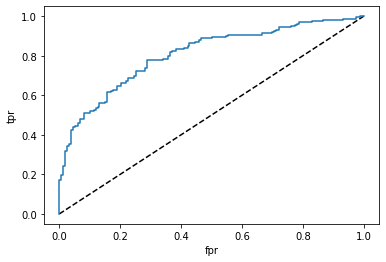

AUC: 0.8063205593968514
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       159
           1       0.73      0.78      0.75       161

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



0.740625

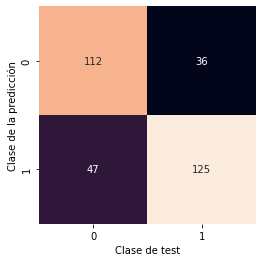

In [ ]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced')
# model.fit(X_train, Y_train);

pipe = Pipeline([('fselector', SelectKBest(chi2, k=all_lr['n_feature'][0])), ('lr', model)])
pipe.fit(X_train, Y_train)
new_Y_pewd = pipe.predict_proba(X_test)

# new_Y_pewd = model.predict_proba(X_test)
umbral_prob = 0.5
Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
get_scores(Y_pred, new_Y_pewd, Y_test)

### Importancia de los features

Para validar la importancia de los features en cada uno de los modelos, partimos en ambos casos del mejor modelo hayado. Luego, ejecutamos el modelo quitando de a uno a la vez cada feature. De esta forma, podemos obtener la variación del accuracy al eliminar cada feature. Luego, aquellos modelos con mejor accuracy surgen al eliminar los features que resultan menos significativos o que aportan menor cantidad de información al modelo.

In [ ]:
model = GaussianNB()
pipe = Pipeline([('gnb', model)])
# model.fit(X_train, Y_train);
f_importance = []
for i in range(len(features)):
  n_f = list(X_train.columns)
  n_f.pop(i)
  X_train_n = X_train[n_f]
  X_test_n = X_test[n_f]
  
  pipe.fit(X_train_n, Y_train)
  new_Y_pewd = pipe.predict_proba(X_test_n)

  # new_Y_pewd = model.predict_proba(X_test)
  umbral_prob = 0.5
  Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
  accuracy = accuracy_score(Y_test, Y_pred)

  f_importance += [(features[i], accuracy)]

pd.DataFrame(sorted(f_importance, key=lambda x:x[1], reverse=True), columns=['feature_extracted', 'acc'])

,feature_extracted,acc
0,residual sugar,0.746875
1,pH,0.746875
2,fixed acidity,0.740625
3,citric acid,0.737500
4,total sulfur dioxide,0.737500
5,free sulfur dioxide,0.734375
6,chlorides,0.731250
7,density,0.728125
8,sulphates,0.715625
9,volatile acidity,0.709375


In [ ]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced')
pipe = Pipeline([('lr', model)])
# model.fit(X_train, Y_train);
f_importance = []
for i in range(len(features)):
  n_f = list(X_train.columns)
  n_f.pop(i)
  X_train_n = X_train[n_f]
  X_test_n = X_test[n_f]
  
  pipe.fit(X_train_n, Y_train)
  new_Y_pewd = pipe.predict_proba(X_test_n)

  # new_Y_pewd = model.predict_proba(X_test)
  umbral_prob = 0.5
  Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
  accuracy = accuracy_score(Y_test, Y_pred)

  f_importance += [(features[i], accuracy)]

pd.DataFrame(sorted(f_importance, key=lambda x:x[1], reverse=True), columns=['feature_extracted', 'acc'])

,feature_extracted,acc
0,free sulfur dioxide,0.740625
1,density,0.740625
2,pH,0.740625
3,residual sugar,0.737500
4,chlorides,0.737500
5,sulphates,0.734375
6,citric acid,0.731250
7,fixed acidity,0.728125
8,total sulfur dioxide,0.728125
9,volatile acidity,0.693750


# PARTE 4
Explique las bases teóricas del algoritmo k-NN (k-nearest neighbors) y aplíquelo al dataset. Compare con los resultados obtenidos en la parte 3.



## Bases teóricas
El algoritmo de k-nearest neighbors (KNN) es un algoritmo de aprendizaje automático supervisado simple que se puede utilizar para resolver problemas de clasificación y regresión. Es fácil de implementar y comprender, pero tiene el principal inconveniente de que se ralentiza significativamente a medida que aumenta el tamaño de los datos en uso. 

KNN funciona encontrando las distancias entre una consulta y todas las instancias en los datos de entrenamient, seleccionando las K instancias más cercanos a la consulta. Luego vota por la etiqueta más frecuente (en el caso de clasificación) o promedia las etiquetas (en el caso de la regresión). 
En nuestro caso, ademas, se propone seleccionar los features de las instancias que aporten mayor cantidad de informacion para la prediccion de la clase 'quality'.

Por último, determinar el valor K puede ser una tarea comleja. A mayor K, se esperaría poder tener mejores resultados. Pero un K demasiado grande, puede ser contraproducente para el modelo, ya que se considerarían como similares demasiadas instancias.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
all_results = []
for f in range(1,len(features)):
  for K in range(5,120,5):  
    model = KNeighborsClassifier (n_neighbors=K)

    pipe = Pipeline([('fselector', SelectKBest(chi2, k=f)), ('knn', model)])
    pipe.fit(X_train, Y_train)
    new_Y_pewd = pipe.predict_proba(X_test)

    umbral_prob = 0.5
    Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
    all_results += [(K,get_scores(Y_pred, new_Y_pewd, Y_test, False),f)]

pd.DataFrame(sorted(all_results, key = lambda x : x[1], reverse=True), columns=['K', 'acc', 'n_features'])

,K,acc,n_features
0,5,0.681250,4
1,5,0.671875,3
2,15,0.671875,5
3,15,0.671875,9
4,15,0.671875,10
...,...,...,...
225,10,0.590625,1
226,105,0.578125,1
227,20,0.575000,1
228,15,0.571875,1


Aqui se realiza un estudio para determinar cuales son los f mejores features (que seran seleccionados por el SelectKBest) y cual es el mejor K para el modelo. El resto de los hiperparametros se mantienen iguales.

In [ ]:
all_results = []
for f in range(1,len(features)):
  for K in range(5,120,5):  
    model = KNeighborsClassifier (n_neighbors=K, weights='distance') #Se probaron todos los algorithms y ninguno cambio los resultados

    pipe = Pipeline([('fselector', SelectKBest(chi2, k=f)), ('knn', model)])
    pipe.fit(X_train, Y_train)
    new_Y_pewd = pipe.predict_proba(X_test)

    umbral_prob = 0.5
    Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
    all_results += [(K,get_scores(Y_pred, new_Y_pewd, Y_test, False),f)]

all_results = sorted(all_results, key = lambda x : x[1], reverse=True)
all_results = pd.DataFrame(all_results, columns=['K', 'acc', 'n_features'])
all_results

,K,acc,n_features
0,15,0.771875,9
1,40,0.771875,9
2,15,0.771875,10
3,40,0.771875,10
4,20,0.768750,5
...,...,...,...
225,95,0.550000,1
226,100,0.550000,1
227,105,0.550000,1
228,110,0.550000,1


Se realiza de forma iterativa, al igual que en caso anterior, diversos ensayos del modelo hasta hallar la mejor combinación de K y numero de features.

En este caso también se corre el modelo dando peso a la cercania de las instancias vecinas al momento de la clasificación. Es decir, de las K instancias más cercanas, aquellas más cercanas tendran más peso en la decision y las más lejanas tendran menos.

Esta técnica permite lograr mayor accuracy.

### Mejor modelo de KNN

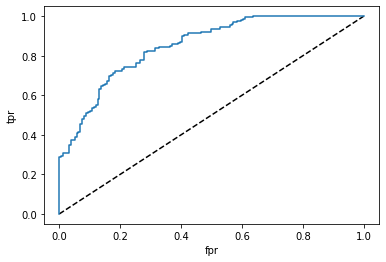

AUC: 0.850658228837064
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       159
           1       0.75      0.82      0.78       161

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



0.771875

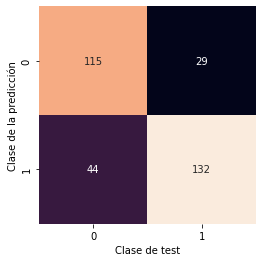

In [ ]:
model = KNeighborsClassifier (n_neighbors=all_results['K'][0], weights='distance')

pipe = Pipeline([('fselector', SelectKBest(chi2, k=all_results['n_features'][0])), ('knn', model)])
pipe.fit(X_train, Y_train)
new_Y_pewd = pipe.predict_proba(X_test)

umbral_prob = 0.5
Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
get_scores(Y_pred, new_Y_pewd, Y_test)

# PARTE 5

Ensaye una discusión general del trabajo realizado, haciendo los comentarios y 
recomendaciones que considere necesarias.